In [1]:
import pandas as pd
import numpy as np

# игнорируем warnings
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

# настройка внешнего вида графиков в seaborn
sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = { 
        "figure.figsize" : (12, 9), 
        "axes.titlesize" : 18 
    }
)
from scipy.stats import spearmanr, pearsonr

In [2]:
train = pd.read_csv('mlbootcamp5_train.csv', sep=',',
                    index_col='id')

In [3]:
print('Размер датасета: ', train.shape)
train.head()

Размер датасета:  (70000, 12)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


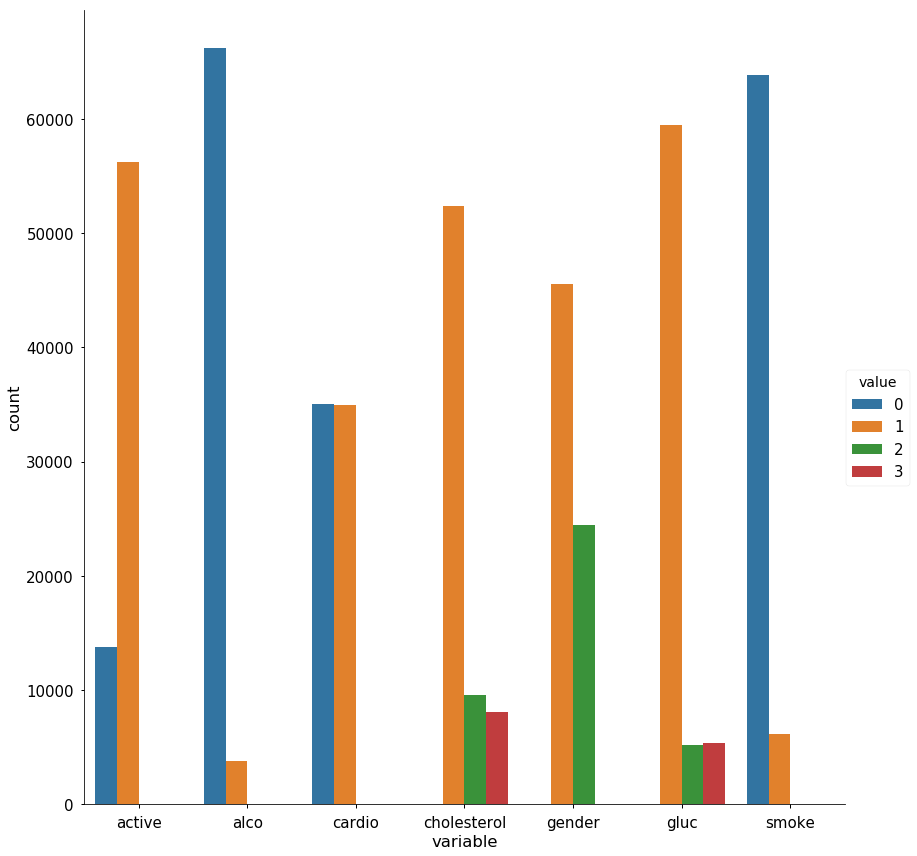

In [4]:
train_uniques = pd.melt(frame=train, value_vars=['gender','cholesterol', 
                                                 'gluc', 'smoke', 'alco', 
                                                 'active', 'cardio'])
train_uniques = pd.DataFrame(train_uniques.groupby(['variable', 
                                                    'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
    
sns.factorplot(x='variable', y='count', hue='value', 
               data=train_uniques, kind='bar', size=12);

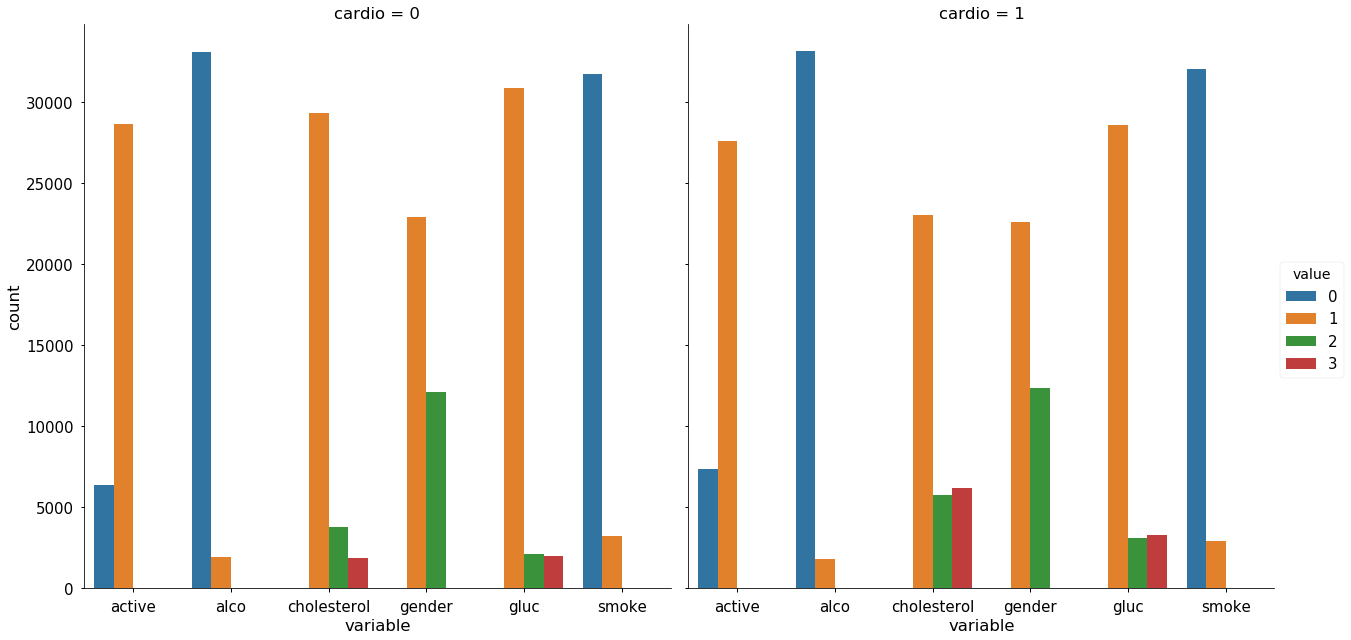

In [5]:
train_uniques = pd.melt(frame=train, value_vars=['gender','cholesterol', 
                                                 'gluc', 'smoke', 'alco', 
                                                 'active'], 
                        id_vars=['cardio'])
train_uniques = pd.DataFrame(train_uniques.groupby(['variable', 'value', 
                                                    'cardio'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
    
sns.factorplot(x='variable', y='count', hue='value', 
               col='cardio', data=train_uniques, kind='bar', size=9);

In [6]:
for c in train.columns:
    n = train[c].nunique()
    print(c)
    
    if n <= 3:
        print(n, sorted(train[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


___1. Визуализируем корреляционную матрицу___
* Для того чтобы лучше понять признаки в датасете, можно посчитать матрицу коэффициентов корреляции между признаками.

___Постройте heatmap корреляционной матрицы.___

___1. Какие два признака больше всего коррелируют (по Пирсону) с признаком height?___

* Gluc, Cholesterol
* Weight, Alco
* Smoke, Alco
* Weight, Gender

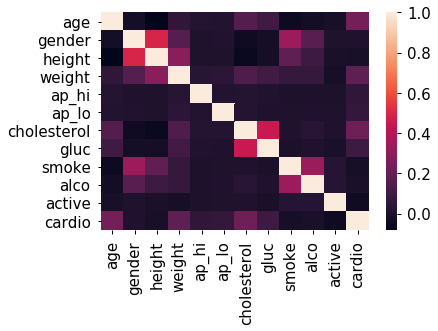

In [7]:
sns.heatmap(train.corr())

In [8]:
print('g_w=', pearsonr(train.gender,train.weight))
print('a_w=', pearsonr(train.alco,train.weight))
print('c_g=', pearsonr(train.cholesterol,train.gluc))
print('s_al=', pearsonr(train.smoke,train.alco))


g_w= (0.15540564009000196, 0.0)
a_w= (0.067112841225705822, 1.0822529542118149e-70)
c_g= (0.45157752367576154, 0.0)
s_al= (0.34009376786968853, 0.0)


___Постройте violinplot для роста и пола. Используйте:___

* hue – для разбивки по полу
* scale – для оценки количества каждого из полов

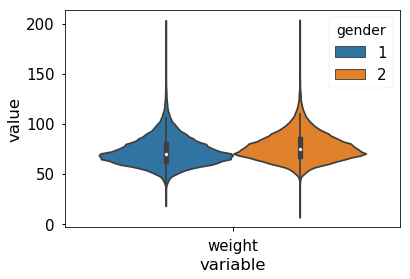

In [9]:
df = pd.melt(train, value_vars=['weight'], id_vars=['gender'])
sns.violinplot(x='variable', y='value', hue='gender', data=df);

___Постройте на одном графике два отдельных kdeplot роста, отдельно для мужчин и женщин. На нем разница будет более наглядной, но нельзя будет оценить количество мужчин/женщин.___

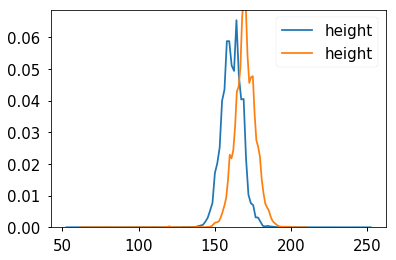

In [10]:
w = train[train['gender'] == 1]['height']
m = train[train['gender'] == 2]['height']

sns.kdeplot(w);
sns.kdeplot(m);

___Постройте корреляционную матрицу, используя коэффициент Спирмена.___

___3.1 Какие признаки теперь больше всего коррелируют (по Спирмену) друг с другом?___
* Height, Weight
* Age, Weight
* __Ap_hi, Ap_lo__
* Cholesterol, Gluc
* Cardio, Cholesterol
* Smoke, Alco

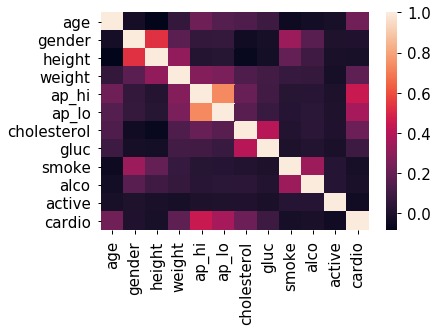

In [11]:
sns.heatmap(train.corr(method='spearman'));

In [15]:
print('h_w =',spearmanr(train.height,train.weight))
print('a_w =', spearmanr(train.age,train.weight))
print('ah_al =', spearmanr(train.ap_hi,train.ap_lo))
print('c_g =', spearmanr(train.cholesterol,train.gluc))
print('c_car =', spearmanr(train.cholesterol,train.cardio))
print('s_al =',spearmanr(train.smoke,train.alco))

h_w = SpearmanrResult(correlation=0.31356926989984962, pvalue=0.0)
a_w = SpearmanrResult(correlation=0.06155893830937044, pvalue=9.5304524006503491e-60)
ah_al = SpearmanrResult(correlation=0.73543610513797764, pvalue=0.0)
c_g = SpearmanrResult(correlation=0.40780334258686335, pvalue=0.0)
c_car = SpearmanrResult(correlation=0.21511719895015888, pvalue=0.0)
s_al = SpearmanrResult(correlation=0.34009376786968865, pvalue=0.0)


___4.1 Сколько чётко выраженных кластеров получилось на совместном графике выбранных признаков, с логарифмической шкалой? Под кластером в данной задаче понимается плотное скопление точек, в окрестности которого пренебрежительно мало одиночных наблюдений и которое визуально отделимо от других кластеров.___
* 1
* 2
* 3
* __больше трёх__

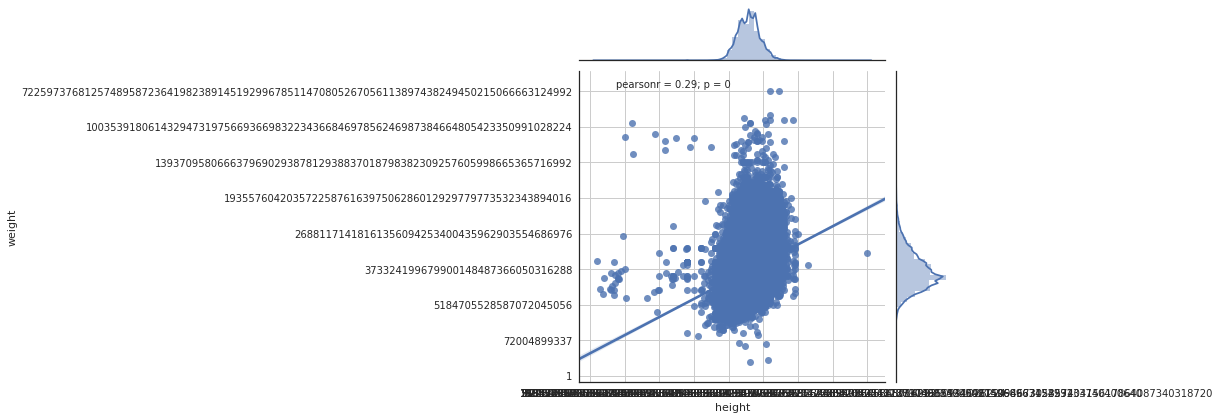

In [13]:
sns.set(style="white", color_codes=True)
g = sns.jointplot("height", "weight", data=train, kind="reg")
"""Сетка"""
g.ax_joint.grid(True) 

"""Преобразуем логарифмические значения на шкалах в реальные"""
g.ax_joint.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(round(int(np.exp(x))))))
g.ax_joint.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(round(int(np.exp(x))))))

Постройте Countplot, где на оси абсцисс будет отмечен возраст, на оси ординат – количество. Каждое значение возраста должно иметь два столбца, соответствующих количеству человек каждого класса cardio (здоров/болен) данного возраста.

___5. В каком возрасте количество пациентов с ССЗ впервые становится больше, чем здоровых?___
* 44
* 49
* 53
* 62

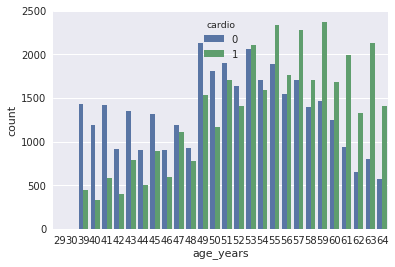

In [14]:
train['age_years'] = (train['age'] // 365.25).astype(int)
sns.set(style="darkgrid")
ax = sns.countplot(x="age_years", hue="cardio", data=train)